In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [12]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

model_boston = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + \
                                            AGE + DIS + RAD + TAX + PTRATIO + \
                                            B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()

In [13]:
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        17:01:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

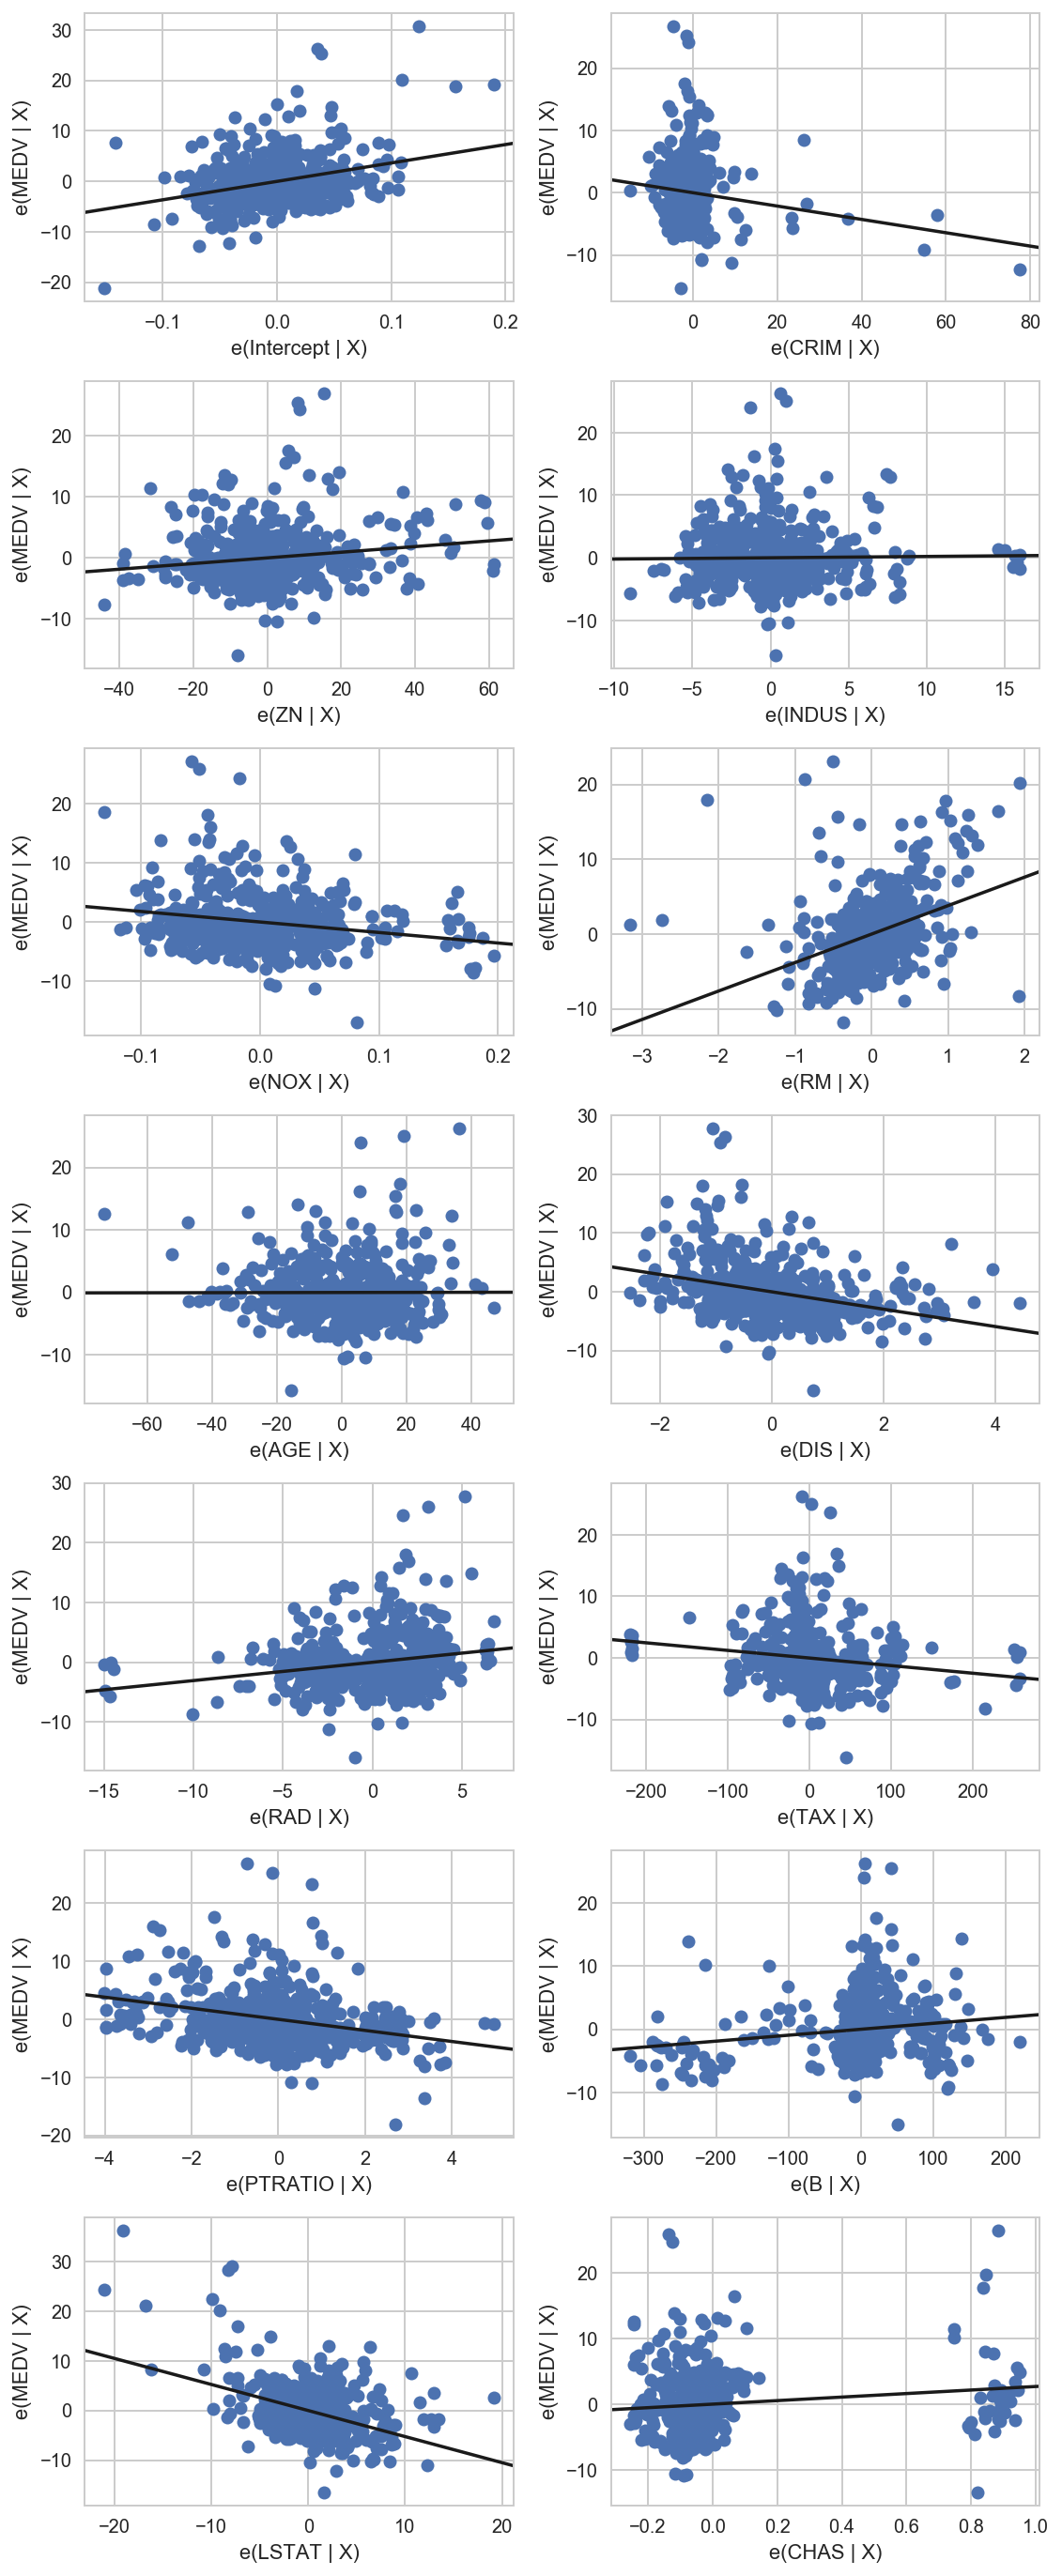

In [11]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

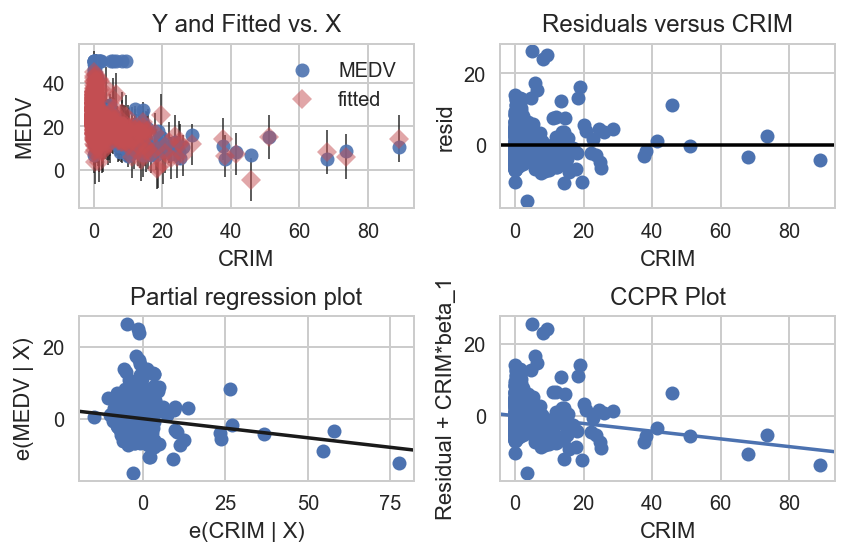

In [81]:
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
fig.suptitle("")
plt.show()

-0.10717055656035432 -0.10717055656035483


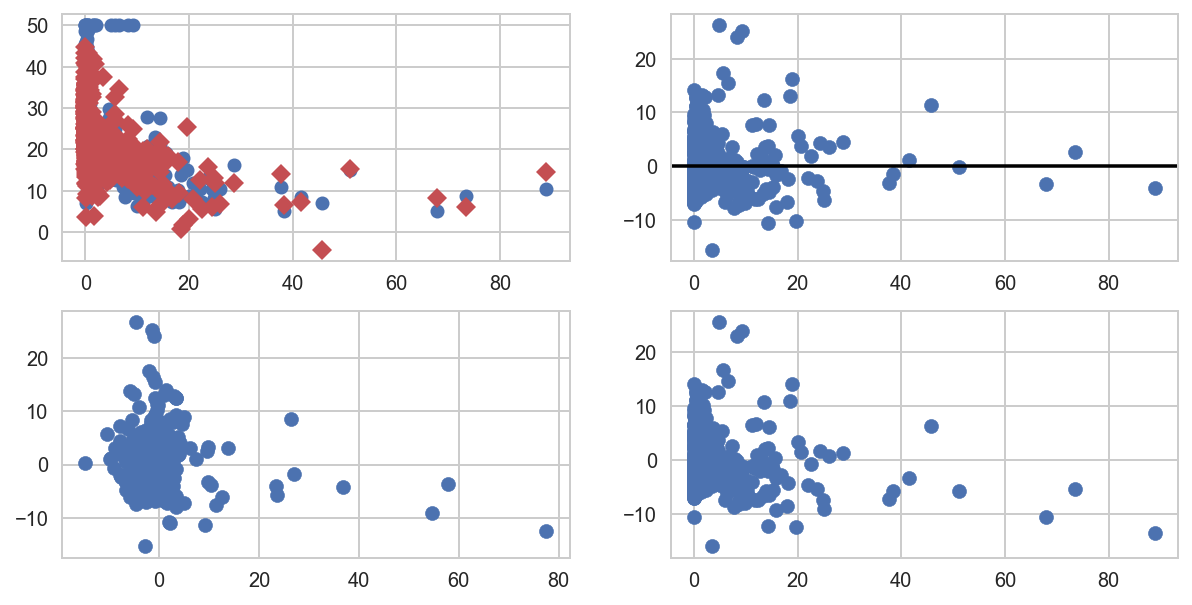

In [118]:
def my_plot_regress_exog(result, colname):
    # 1. crime 빼고 종속변수 medv으로 선형회귀
    # 2. medv 빼고 종속변수 crime으로 선형회귀
    # 3. 
    
    
    y = result.model.endog
    exog_idx = result_boston.model.exog_names.index("CRIM")
    X = np.delete(result_boston.model.exog, exog_idx, axis=1)

    model1 = sm.OLS(y, X)
    res1 = model1.fit()
    eyx = res1.resid
    
    
    x1 = result_boston.model.exog[:, exog_idx]
    model2 = sm.OLS(x1, X)
    res2 = model2.fit()
    ezx = res2.resid
    
    
    model3 = sm.OLS(eyx, ezx)
    res3 = model3.fit()
    e = res3.resid
    
    # 계수가 같다
    print(res3.params[0], result.params[exog_idx] )
    
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(2, 2, 1)
    plt.plot(x1, result.model.endog, 'o')
    plt.plot(x1, result.fittedvalues, 'D', color='r')
    
    plt.subplot(2, 2, 2)
    plt.scatter(x1, result.resid)
    plt.axhline(y=0, color='black')
    
    plt.subplot(2, 2, 3)
    plt.scatter(ezx, eyx)
    
    # ccpr 
    x1beta = x1 * result.params[exog_idx] 
    mod = sm.OLS(x1beta, sm.add_constant(x1)).fit()
    params = mod.params
    
    plt.subplot(2, 2, 4)
    plt.scatter(x1, x1beta + result.resid)
    #sm.graphics.abline_plot(params)
    
my_plot_regress_exog(result_boston, "CRIM")